In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 12.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Uploading the Data File
from google.colab import files
uploaded = files.upload()

Saving countrybrandingdatafeb162024.xlsx to countrybrandingdatafeb162024.xlsx


In [160]:
# Reading the Data from different sheets
file_path = 'countrybrandingdatafeb162024.xlsx'
sheet_names = ['DV GDP_PPP', 'IVs factors']
# Read each sheet into a separate data frame
df1 = pd.read_excel(file_path, sheet_name=sheet_names[0])
df2 = pd.read_excel(file_path, sheet_name=sheet_names[1])

In [161]:
df1.head()

,country,2016,2017,2018,2019,2020,2021,2022
0,Algeria,11685.451418,11809.483033,12007.774713,12120.406374,11452.226624,12170.193777,13209.596769
1,Argentina,20307.870052,23597.117753,23294.098675,23007.836592,20787.857871,23754.361390,26504.590562
2,Australia,47249.434815,48400.245788,50192.957328,51909.015102,53066.490989,55947.052228,62625.357642
3,Austria,52684.017113,54172.986789,56937.944283,59704.223378,57258.690227,59962.827052,67935.847974
4,Azerbaijan,14371.022741,14121.406936,14551.200114,15054.544607,14495.656972,15927.210148,17764.445589


In [162]:
df2.head()

,Year,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,2016,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,2016,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393
2,2016,Australia,70.436610,90.764070,90.823771,53.479153,68.656392,70.613007,24.834436,32.117963,51.123450,94.910648
3,2016,Austria,59.247783,73.448695,77.106312,37.663487,66.337010,35.716511,8.974374,49.510705,11.188092,71.207580
4,2016,Azerbaijan,1.671710,3.159704,1.539496,1.715254,37.746434,4.412014,4.836940,3.070438,35.930836,5.499866


In [163]:
# Converting columns into rows to perform merge operation
df1_long = pd.melt(df1, id_vars=['country'], value_vars=[2016, 2017, 2018, 2019, 2020, 2021, 2022], var_name='Year', value_name='GDP_PPP')
df1_long.head()

,country,Year,GDP_PPP
0,Algeria,2016,11685.451418
1,Argentina,2016,20307.870052
2,Australia,2016,47249.434815
3,Austria,2016,52684.017113
4,Azerbaijan,2016,14371.022741


In [164]:
# Merging the two data frames with respect to country and year
merged_df=df1_long.merge(df2, left_on=['country', 'Year'], right_on=['Brand','Year'])
merged_df.drop('Brand',axis=1,inplace=True)
merged_df.head()

,country,Year,GDP_PPP,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Argentina,2016,20307.870052,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393
2,Australia,2016,47249.434815,70.436610,90.764070,90.823771,53.479153,68.656392,70.613007,24.834436,32.117963,51.123450,94.910648
3,Austria,2016,52684.017113,59.247783,73.448695,77.106312,37.663487,66.337010,35.716511,8.974374,49.510705,11.188092,71.207580
4,Azerbaijan,2016,14371.022741,1.671710,3.159704,1.539496,1.715254,37.746434,4.412014,4.836940,3.070438,35.930836,5.499866


In [165]:
# Checking if there are any duplicated rows with respect to country and year
np.sum(merged_df.groupby(['country','Year'])['GDP_PPP'].nunique().reset_index()['GDP_PPP']>1)

0

In [166]:
# Getting the summary of the data
null_counts = merged_df.isnull().sum()

# Find the number of unique values in each column
unique_counts = merged_df.nunique()
unique_percentages = (null_counts / len(merged_df) * 100).round(2)

info_df = pd.DataFrame({
    'Null Values': null_counts,
    'Unique Values': unique_counts,
    'Percentage of Unique Values': unique_percentages,
    'Sample Values': merged_df.apply(lambda col: col.unique()), # Display a sample of values
    'No. of Records': merged_df.shape[0]
})

info_df

,Null Values,Unique Values,Percentage of Unique Values,Sample Values,No. of Records
country,0,83,0.0,"[Algeria, Argentina, Australia, Austria, Azerb...",508
Year,0,7,0.0,"[2016, 2017, 2018, 2019, 2020, 2021, 2022]",508
GDP_PPP,1,507,0.2,"[11685.451417918184, 20307.870052141996, 47249...",508
ENTREPRENEURSHIP,0,499,0.0,"[0.8867675653219784, 8.079598305744275, 70.436...",508
QUALITY OF LIFE,0,502,0.0,"[1.2617718541496226, 12.02690580308567, 90.764...",508
SOCIAL PURPOSE,0,503,0.0,"[0.20370789631365716, 14.489880590431435, 90.8...",508
CULTURAL INFLUENCE,0,497,0.0,"[0.0, 24.504257517152293, 53.479153168444505, ...",508
OPEN FOR BUSINESS,0,497,0.0,"[34.180469616753875, 30.600419911638916, 68.65...",508
ADVENTURE,0,502,0.0,"[2.99526865964036, 60.182326318307666, 70.6130...",508
POWER,0,496,0.0,"[6.476640410373533, 3.4582932979704606, 24.834...",508


In [167]:
# Displaying the NULL record
merged_df[merged_df['GDP_PPP'].isnull()]

,country,Year,GDP_PPP,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
470,Lebanon,2022,NaN,1.483236,0.728794,2.600292,5.029332,33.487982,9.612346,6.71208,12.675252,14.933097,2.814142


In [168]:
# As there is a NULL value in GDP of Lebanon 2022
# We would like to predict that value by building a simple linear model
# Because if we replace it with MEAN or Median the optained values doesn't follow the decresing trend

df_lebanon=pd.DataFrame(merged_df[merged_df["country"]=='Lebanon'])
df_lebanon=df_lebanon.drop(columns=['country'])

# Model to predict the 2022 Lebanon GDP_PPP
X = df_lebanon.dropna().drop(columns=['GDP_PPP'])
y = df_lebanon.dropna()['GDP_PPP']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the missing value
predicted_gdp = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_gdp)
# print("Mean Absolute Error:", mae)

# Predict the missing value in the original dataset
missing_value = model.predict(df_lebanon[df_lebanon['GDP_PPP'].isnull()].drop(columns=['GDP_PPP']))


# Replacing the missing value of Lebanon with predicted value
# which follows the market trend
merged_df.loc[merged_df['GDP_PPP'].isnull(), 'GDP_PPP'] = np.round(missing_value,0)

In [169]:
# As we can see the predicted value of 2022 is higher than 2021
# Which follows the GDP trend of Lebanon observed in google.
pd.DataFrame(merged_df[merged_df["country"]=='Lebanon'])

,country,Year,GDP_PPP,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
94,Lebanon,2017,17808.076886,2.056231,1.747673,1.108178,5.212179,33.121804,8.166020,8.221600,24.812637,14.831225,2.770412
168,Lebanon,2018,18368.798123,3.185802,2.636072,1.749116,5.821997,24.562602,8.166697,6.616188,24.870252,18.292728,3.338231
240,Lebanon,2019,17913.884837,1.431570,1.298931,1.766309,4.692614,24.817893,6.898525,8.684085,19.518438,20.850834,3.847145
313,Lebanon,2020,14563.770534,2.097016,1.656119,0.746664,4.414919,25.572702,6.763475,7.732996,19.119520,9.427783,0.000000
389,Lebanon,2021,14330.515633,2.380509,1.379582,2.039968,4.125766,31.515896,7.651293,7.911286,12.941059,10.299294,2.619584
470,Lebanon,2022,15574.000000,1.483236,0.728794,2.600292,5.029332,33.487982,9.612346,6.712080,12.675252,14.933097,2.814142


In [170]:
merged_df.head()

,country,Year,GDP_PPP,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Argentina,2016,20307.870052,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393
2,Australia,2016,47249.434815,70.436610,90.764070,90.823771,53.479153,68.656392,70.613007,24.834436,32.117963,51.123450,94.910648
3,Austria,2016,52684.017113,59.247783,73.448695,77.106312,37.663487,66.337010,35.716511,8.974374,49.510705,11.188092,71.207580
4,Azerbaijan,2016,14371.022741,1.671710,3.159704,1.539496,1.715254,37.746434,4.412014,4.836940,3.070438,35.930836,5.499866


In [171]:
# Taking a copy of merge data
data = merged_df.copy()

In [172]:
# Performing Time Series Analysis to see how the GDP is effecting w.r.t each feature and country
country_list = data['country'].unique().tolist()

feature_list = ['ENTREPRENEURSHIP', 'QUALITY OF LIFE',
       'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 'OPEN FOR BUSINESS',
       'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS', 'OVERALL']

initial_country = country_list[0]
initial_feature = feature_list[0]

dropdown_country = [{'label': country, 'value': country} for country in country_list]
dropdown_feature = [{'label': feature, 'value': feature} for feature in feature_list]

def update_plot(selected_country, selected_feature):
    df_selected = data[data['country'] == selected_country]

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=df_selected['Year'], y=df_selected['GDP_PPP'], mode='lines', name='GDP_PPP'), secondary_y=False)

    fig.add_trace(go.Scatter(x=df_selected['Year'], y=df_selected[selected_feature], mode='lines', name=selected_feature), secondary_y=True)

    fig.update_layout(title=f'{selected_country} - {selected_feature} vs GDP_PPP over the years',
                      xaxis_title='Year')
    fig.update_yaxes(title_text="GDP_PPP", secondary_y=False)
    fig.update_yaxes(title_text=selected_feature, secondary_y=True)

    return fig

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(id='country-dropdown', options=dropdown_country, value=initial_country),
    dcc.Dropdown(id='feature-dropdown', options=dropdown_feature, value=initial_feature),
    dcc.Graph(id='line-plot')
])

@app.callback(
    Output('line-plot', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('feature-dropdown', 'value')]
)
def update_figure(selected_country, selected_feature):
    return update_plot(selected_country, selected_feature)

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [173]:
# Standardizing the data
# To intrepret the results of the model effectively
def standardize(df):
  for column in df.drop(['country','Year'],axis=1).columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
  return df

merged_df = standardize(merged_df)
merged_df.head()

,country,Year,GDP_PPP,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,-0.927970,-0.924967,-1.021097,-0.837256,-1.055269,-0.969026,-1.275011,-0.484811,-1.196444,-0.893694,-1.205044
1,Argentina,2016,-0.579102,-0.692688,-0.657040,-0.391947,-0.063590,-1.160234,1.111601,-0.603971,0.337539,-0.821500,-0.631837
2,Australia,2016,0.510969,1.321012,2.005704,1.987429,1.109013,0.872304,1.546909,0.239925,-0.047742,0.739045,1.755460
3,Austria,2016,0.730856,0.959690,1.420130,1.559847,0.468959,0.748427,0.090558,-0.386205,0.621501,-0.927152,1.016101
4,Azerbaijan,2016,-0.819311,-0.899619,-0.956912,-0.795618,-0.985853,-0.778571,-1.215886,-0.549544,-1.165441,0.105174,-1.033489


In [174]:
# Replacing all spaces in columns with '_'
merged_df.columns = [col.replace(' ', '_') for col in merged_df.columns]

# Model Across All the Countries

In [175]:
df_all_countries=merged_df.drop(columns=['country','Year'])

# Model to predict the 2022 Lebanon GDP_PPP
X = df_all_countries.dropna().drop(columns=['GDP_PPP'])
y = df_all_countries.dropna()['GDP_PPP']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the missing value
predicted_gdp = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_gdp)
print("Mean Absolute Error:", mae)



Mean Absolute Error: 0.42616892485530955


In [176]:
dict(zip(X.columns, model.coef_))

{'ENTREPRENEURSHIP': 0.23874594018958534,
 'QUALITY_OF_LIFE': -0.4334941698611202,
 'SOCIAL_PURPOSE': -0.31551314615703674,
 'CULTURAL_INFLUENCE': 0.13306978628862584,
 'OPEN_FOR_BUSINESS': -0.14208852556330367,
 'ADVENTURE': -0.25366141556935434,
 'POWER': -0.5997074340786873,
 'HERITAGE': -0.354681597806495,
 'MOVERS': -0.1944585479071708,
 'OVERALL': 1.7249065596185142}

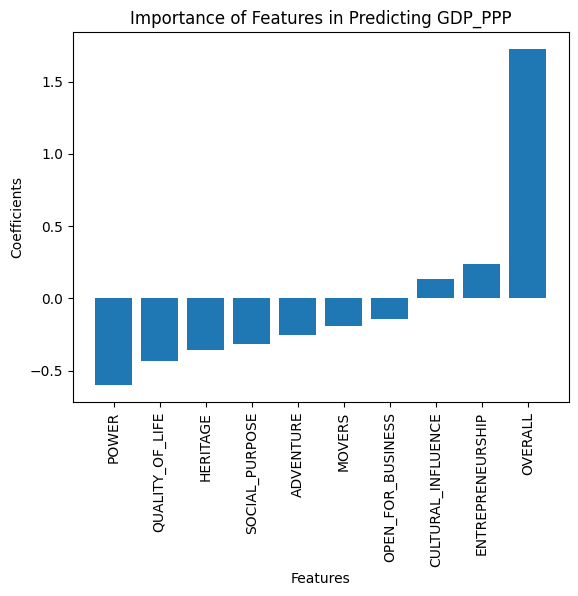

In [177]:
#graphical representation of the coefficients
import matplotlib.pyplot as plt

# Create a dictionary to store the data
data = dict(zip(X.columns, model.coef_))

# Sort the dictionary by values
sorted_data = sorted(data.items(), key=lambda x: x[1])

# Create a bar plot
plt.bar(range(len(sorted_data)), [x[1] for x in sorted_data])
plt.xticks(range(len(sorted_data)), [x[0] for x in sorted_data], rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Importance of Features in Predicting GDP_PPP")
plt.show()


# Model WRT to Country without LAG

Developed individual linear regression models for each country to discern the features influencing GDP for that specific country.

In [178]:
grouped_data = merged_df.drop(['Year'], axis =1).groupby('country')

results_by_country = {}

# Iterate over each country group
for country, country_data in grouped_data:
    X_country = country_data.drop(['country', 'GDP_PPP'], axis=1)
    y_country = country_data['GDP_PPP']

    # Fit linear regression model for the current country
    model = LinearRegression()
    model.fit(X_country, y_country)

    y_pred = model.predict(X_country)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_country, y_pred)
    results_by_country[country] = {'intercept': model.intercept_, 'coefficients': dict(zip(X_country.columns, model.coef_)), 'mape': mape}

In [179]:
#converting results into a dataframe it into a dataframe

results_df = pd.DataFrame.from_dict(results_by_country, orient='index')
results_df = results_df.join(pd.DataFrame(results_df['coefficients'].tolist(),
                                          index=results_df.index,
                                          columns=merged_df.drop(['country', 'GDP_PPP'], axis=1).columns))
results_df.drop(['coefficients','Year'], axis=1, inplace=True)
results_df = results_df.reset_index().rename(columns={'index': 'country'})
results_df.head()

,country,intercept,mape,ENTREPRENEURSHIP,QUALITY_OF_LIFE,SOCIAL_PURPOSE,CULTURAL_INFLUENCE,OPEN_FOR_BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,0.112567,3.203912e-17,0.084106,0.181049,0.234484,0.060542,-0.042704,0.165745,-0.056915,-0.066882,0.084913,0.314880
1,Argentina,-0.840517,2.218961e-16,0.048661,0.026952,0.074907,-0.264354,0.035305,0.398370,0.243116,0.156729,-0.222806,0.262075
2,Australia,0.549714,1.806856e-16,0.734109,-0.305519,-0.947988,0.244344,0.388426,0.408432,0.931754,0.263182,0.319136,-0.114003
3,Austria,0.458244,1.014802e-16,0.073850,0.278424,-0.186496,0.064097,0.085154,0.552850,0.273235,0.165802,-0.130053,-0.162103
4,Azerbaijan,-2.065110,3.773793e-16,1.321603,-1.177893,1.409544,-1.200834,-0.290136,-1.534699,-1.826029,0.808396,-0.505021,0.827227


In [180]:
# Identifying the top 3 features(ID's) that are effecting the GDP for each country
top_features = results_df.drop(['country','intercept','mape'], axis=1).abs().idxmax(axis=1)
results_df['top_feature_1'] = 0
results_df['top_feature_2'] = 0
results_df['top_feature_3'] = 0

for idx, row in results_df.drop(['country','intercept','mape'], axis=1).iterrows():
    sorted_features = sorted(row.items(), key=lambda x: abs(x[1]), reverse=True)

    top_features_row = [feat[0] for feat in sorted_features[:3]]

    results_df.at[idx, 'top_feature_1'] = top_features_row[0]
    results_df.at[idx, 'top_feature_2'] = top_features_row[1]
    results_df.at[idx, 'top_feature_3'] = top_features_row[2]

In [181]:
results_df[['country','top_feature_1','top_feature_2','top_feature_3']]

,country,top_feature_1,top_feature_2,top_feature_3
0,Algeria,OVERALL,SOCIAL_PURPOSE,QUALITY_OF_LIFE
1,Argentina,ADVENTURE,CULTURAL_INFLUENCE,OVERALL
2,Australia,SOCIAL_PURPOSE,POWER,ENTREPRENEURSHIP
3,Austria,ADVENTURE,QUALITY_OF_LIFE,POWER
4,Azerbaijan,POWER,ADVENTURE,SOCIAL_PURPOSE
...,...,...,...,...
78,United Kingdom,CULTURAL_INFLUENCE,ENTREPRENEURSHIP,MOVERS
79,United States,CULTURAL_INFLUENCE,HERITAGE,MOVERS
80,Uruguay,CULTURAL_INFLUENCE,POWER,ADVENTURE
81,Uzbekistan,OPEN_FOR_BUSINESS,MOVERS,OVERALL


In [182]:
# Grouping the country with respect to the most effecting variable
results_df.groupby('top_feature_1')['country'].unique().reset_index()

,top_feature_1,country
0,ADVENTURE,"[Argentina, Austria, Bulgaria, Denmark, Ghana,..."
1,CULTURAL_INFLUENCE,"[Bahrain, Czechia, Egypt, Guatemala, Jordan, K..."
2,ENTREPRENEURSHIP,"[Bangladesh, Belarus, Cameroon, Dominican Repu..."
3,HERITAGE,"[Canada, Estonia, France, Lithuania, Myanmar, ..."
4,MOVERS,"[Latvia, Lebanon, Russian Federation, Ukraine]"
5,OPEN_FOR_BUSINESS,"[Cambodia, Croatia, Uzbekistan]"
6,OVERALL,"[Algeria, Brazil, Costa Rica, Hungary, Luxembo..."
7,POWER,"[Azerbaijan, Chile, Colombia, Japan, Kazakhsta..."
8,QUALITY_OF_LIFE,"[Belgium, India, Panama, Sri Lanka, Sweden, Sw..."
9,SOCIAL_PURPOSE,"[Australia, China, Finland, Indonesia, Malaysi..."


# Model with LAG features

In [183]:
# Creating the LAG features to explain yearly GDP_PPP with the country factor scores from the same year and before

lagged_factors = merged_df.drop(['country','Year','GDP_PPP'], axis =1).columns.tolist()
lag = 1
merged_df.sort_values(by=['country', 'Year'], inplace=True)
for factor in lagged_factors:
    merged_df[f'{factor}_lag{lag}'] = merged_df.groupby('country')[factor].shift(lag)
merged_df.dropna(inplace=True)

In [184]:
merged_df

,country,Year,GDP_PPP,ENTREPRENEURSHIP,QUALITY_OF_LIFE,SOCIAL_PURPOSE,CULTURAL_INFLUENCE,OPEN_FOR_BUSINESS,ADVENTURE,POWER,...,ENTREPRENEURSHIP_lag1,QUALITY_OF_LIFE_lag1,SOCIAL_PURPOSE_lag1,CULTURAL_INFLUENCE_lag1,OPEN_FOR_BUSINESS_lag1,ADVENTURE_lag1,POWER_lag1,HERITAGE_lag1,MOVERS_lag1,OVERALL_lag1
56,Algeria,2017,-0.922952,-0.899184,-1.005407,-0.791861,-1.055269,-0.428929,-1.232502,-0.501431,...,-0.924967,-1.021097,-0.837256,-1.055269,-0.969026,-1.275011,-0.484811,-1.196444,-0.893694,-1.205044
130,Algeria,2018,-0.914929,-0.945105,-0.944804,-0.790731,-1.055269,-0.926126,-1.206182,-0.557826,...,-0.899184,-1.005407,-0.791861,-1.055269,-0.428929,-1.232502,-0.501431,-1.053158,-0.886110,-1.162561
427,Algeria,2022,-0.866303,-0.865005,-0.998762,-0.703716,-0.974161,-0.581929,-1.163287,-0.549612,...,-0.945105,-0.944804,-0.790731,-1.055269,-0.926126,-1.206182,-0.557826,-1.052313,-1.059498,-1.205044
57,Argentina,2017,-0.446017,-0.563215,-0.595357,-0.325690,0.032841,-1.181118,1.315192,-0.570378,...,-0.692688,-0.657040,-0.391947,-0.063590,-1.160234,1.111601,-0.603971,0.337539,-0.821500,-0.631837
131,Argentina,2018,-0.458278,-0.548454,-0.711880,-0.352617,-0.066328,-1.102406,1.445407,-0.556254,...,-0.563215,-0.595357,-0.325690,0.032841,-1.181118,1.315192,-0.570378,0.691622,-0.737583,-0.554306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Viet Nam,2018,-1.001519,-0.714612,-0.466467,-0.773183,-0.735679,0.191209,-0.453255,-0.355392,...,-0.634658,-0.393896,-0.747583,-0.784755,0.454532,-0.476732,-0.379640,0.213899,0.620294,-0.535432
277,Viet Nam,2019,-0.968376,-0.702806,-0.404615,-0.749540,-0.707888,0.210505,-0.289712,-0.369455,...,-0.714612,-0.466467,-0.773183,-0.735679,0.191209,-0.453255,-0.355392,0.147993,1.002465,-0.541069
349,Viet Nam,2020,-0.954248,-0.645855,-0.446915,-0.769179,-0.732836,0.488703,-0.347347,-0.367215,...,-0.702806,-0.404615,-0.749540,-0.707888,0.210505,-0.289712,-0.369455,0.439486,0.877292,-0.444148
426,Viet Nam,2021,-0.926257,-0.661320,-0.363342,-0.787788,-0.694717,0.530259,-0.167246,-0.145987,...,-0.645855,-0.446915,-0.769179,-0.732836,0.488703,-0.347347,-0.367215,0.270656,0.196879,-0.549907


In [185]:
df_lag=merged_df.drop(columns=['country','Year'])

# Model to predict the 2022 Lebanon GDP_PPP
X = df_lag.dropna().drop(columns=['GDP_PPP'])
y = df_lag.dropna()['GDP_PPP']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the missing value
predicted_gdp = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_gdp)
print("Mean Absolute Error:", mae)



Mean Absolute Error: 0.36497912235606417


In [186]:
dict(zip(X.columns, model.coef_))

{'ENTREPRENEURSHIP': -0.21564818920541534,
 'QUALITY_OF_LIFE': -0.3208502645943003,
 'SOCIAL_PURPOSE': -0.2713814740795082,
 'CULTURAL_INFLUENCE': -0.07592133443266323,
 'OPEN_FOR_BUSINESS': -0.40674903731777273,
 'ADVENTURE': 0.36673735179339495,
 'POWER': -0.6540260706922466,
 'HERITAGE': -0.4554748392757878,
 'MOVERS': -0.3709490720453924,
 'OVERALL': 2.161396898497964,
 'ENTREPRENEURSHIP_lag1': 0.22691912366273093,
 'QUALITY_OF_LIFE_lag1': -0.7047587811146143,
 'SOCIAL_PURPOSE_lag1': -0.26402127229353023,
 'CULTURAL_INFLUENCE_lag1': 0.031174376341334294,
 'OPEN_FOR_BUSINESS_lag1': 0.18716380361497492,
 'ADVENTURE_lag1': -0.8033035353058527,
 'POWER_lag1': -0.22620145856147422,
 'HERITAGE_lag1': 0.07165264387631494,
 'MOVERS_lag1': -0.02051015958008064,
 'OVERALL_lag1': 1.033747912593042}

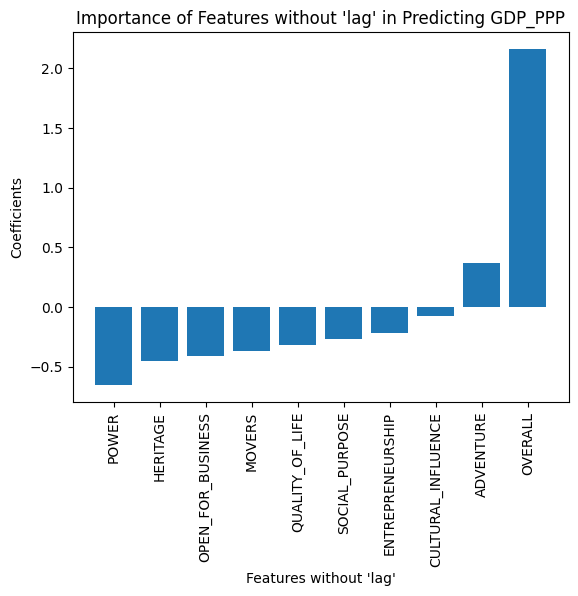

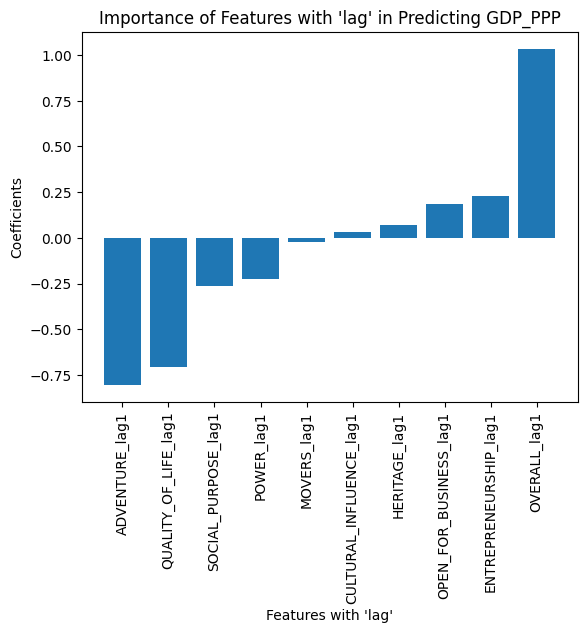

In [187]:
import matplotlib.pyplot as plt
# Bar plot for features without 'lag'
features_without_lag = [feature for feature in X.columns if 'lag' not in feature]

data_without_lag = dict(zip(features_without_lag, model.coef_[:len(features_without_lag)]))
sorted_data_without_lag = sorted(data_without_lag.items(), key=lambda x: x[1])

plt.bar(range(len(sorted_data_without_lag)), [x[1] for x in sorted_data_without_lag])
plt.xticks(range(len(sorted_data_without_lag)), [x[0] for x in sorted_data_without_lag], rotation=90)
plt.xlabel("Features without 'lag'")
plt.ylabel("Coefficients")
plt.title("Importance of Features without 'lag' in Predicting GDP_PPP")
plt.show()

# Bar plot for features with 'lag'
features_with_lag = [feature for feature in X.columns if 'lag' in feature]

data_with_lag = dict(zip(features_with_lag, model.coef_[len(features_without_lag):]))
sorted_data_with_lag = sorted(data_with_lag.items(), key=lambda x: x[1])

plt.bar(range(len(sorted_data_with_lag)), [x[1] for x in sorted_data_with_lag])
plt.xticks(range(len(sorted_data_with_lag)), [x[0] for x in sorted_data_with_lag], rotation=90)
plt.xlabel("Features with 'lag'")
plt.ylabel("Coefficients")
plt.title("Importance of Features with 'lag' in Predicting GDP_PPP")
plt.show()
